# 正则化线性回归

在这个练习中，你将利用水库中水位的变化来预测从大坝中排除的水量

## 可视化数据集 Visualizing the dataset

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pylab as plt

from scipy.io import loadmat 

In [2]:
df = loadmat('ex5data1.mat')

In [3]:
X = df['X']
y = df['y']
Xtest = df['Xtest']
ytest = df['ytest']
Xval = df['Xval']
yval = df['yval']

In [4]:
X.shape,y.shape

((12, 1), (12, 1))

In [5]:
Xtest.shape,ytest.shape,Xval.shape,yval.shape

((21, 1), (21, 1), (21, 1), (21, 1))

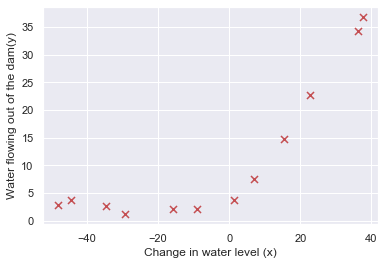

In [6]:
sns.set(style='darkgrid')
fig, ax = plt.subplots()
ax.scatter(X,y,s=50,c='r',marker='x')


ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam(y)')

plt.show()

## 代价函数

线性回归代价函数：

$$
J\left( \theta  \right)=\frac{1}{2m}[\sum\limits_{i=1}^{m}{{{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})}^{2}}}]\\
$$

其中：
$$
h_\theta\left( x \right)=\theta^TX\\
$$

In [13]:
# 1.对数据进行预处理 添加新的一列
X = np.insert(X, 0, values=np.ones(X.shape[0]),axis=1)
Xtest = np.insert(Xtest, 0, values=np.ones(Xtest.shape[0]),axis=1)
Xval = np.insert(Xval, 0, values=np.ones(Xval.shape[0]),axis=1)

In [14]:
X.shape,Xtest.shape,Xval.shape

((12, 2), (21, 2), (21, 2))

In [7]:
# 或者使用以下代码
#X, Xtest, Xval = [np.insert(i, 0, values=np.ones(i.shape[0]), axis=1) for i in (X, Xtest, Xval)]

In [15]:
# 2.初始化θ矩阵
theta = np.ones(X.shape[1])
theta.shape

(2,)

In [10]:
def computerCost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    m = X.shape[0]
    inner = (X * theta.T) - y
    sum = np.sum(np.power(inner,2))
    
    return sum / (2*m)    

In [12]:
# 3.计算代价函数
computerCost(theta,X,y)

303.9515255535976

## 

In [ ]:
m